# Load the libraries

In [286]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import numpy as np
import pandas as pd

In [287]:
from sklearn.datasets import make_classification
n_classes = 3
X, y = make_classification(n_samples=10000, n_features=5, n_classes = 3, n_informative=3, random_state = 0)
print(X)

[[ 1.63535603e+00  9.78570362e-01  1.83188775e+00 -1.13256496e+00
   7.55949342e-01]
 [ 1.47343569e-03  1.56325462e-01  8.47696449e-02 -4.55621953e-01
  -1.92333275e-01]
 [ 4.93369646e-01 -8.52774807e-01  1.54154163e+00  1.11809604e+00
   5.33317911e-01]
 ...
 [ 2.18604601e-01  7.38556921e-01 -7.04780312e-01 -4.19655364e-01
   2.37297748e-01]
 [ 1.73290160e+00  1.41619983e+00  1.58818257e+00 -1.65126543e+00
   7.18562747e-01]
 [-4.59024705e-01  1.42987317e-01 -1.40236221e+00  4.12418101e-01
   4.60772989e-02]]


# KMeans Class - Implementation

In [288]:
class Spherical_Means:
    def __init__(self, no_of_clusters, max_iter, threshold):
        self.no_of_clusters = no_of_clusters
        self.max_iter = max_iter
        self.threshold = threshold
    
    #Initialize the cluster labels
    def cluster_initialization(self,data):
        labels = np.empty([data.shape[0]])
        labels = []
        for i in range(data.shape[0]):   
            temp = np.random.randint(0,self.no_of_clusters)
            labels.append(temp)
        return labels
    
    # Calculate the mean of each cluster 
    def calculate_mean(self,data,labels):
        print("labels inside calculate mean", labels)
        #cal_mean = np.zeros([self.no_of_clusters,data.shape[1]])
        cal_mean = []
        data_labels = [[] for i in range(data.shape[0])]
        
        for i in range(len(np.array(labels))):
            data_labels[labels[i]].append([data[i]])
        
        for i in range(self.no_of_clusters):
            data_matrix = np.matrix(np.array(data_labels[i]))
            data_matrix = data_matrix/np.linalg.norm(data_matrix)
            mean = np.mean(data_matrix,axis=0)
            mean = np.array(mean /np.linalg.norm(mean))
            cal_mean.append(np.ravel(mean))
        #print("calculated mean", cal_mean)
        return np.matrix(cal_mean)
    
    def similarity(self,vec1,vec2):
        vec1 = np.ravel(vec1)
        vec1 = vec1/np.linalg.norm(vec1)
        vec2 = np.ravel(vec2)
        vec2= vec2/np.linalg.norm(vec2)
        
        sim = np.dot(vec1, vec2)
        return sim
        
    
    #Calculate the distance of each points for all cluster centriods                
    def calculate_distance(self,data, mean, distance_type = "Euclidean"):
        dist_arr = list()
        for idx in range(data.shape[0]):
            a = []
            for clst in range(self.no_of_clusters):
                a.append(self.similarity(data[idx], mean[clst]))
                
            dist_arr.append(a)   
         
        return dist_arr
    
    #Update the label for each data point based on minimum distance from the cluster centriod
    def update_label(self,dist_arr):
        #print("Update Label")
        #print(dist_arr)
        return [np.argmax(i) for i in dist_arr ]
        
       
    def fit(self,data):
        labels = self.cluster_initialization(data)
        print(labels)
        old_mean =  np.zeros([self.no_of_clusters,data.shape[1]])
        
        for i in range(self.max_iter):
            print("Iteration ", i)
           
            new_mean = self.calculate_mean(data,labels) 
            dist_arr = self.calculate_distance(data,new_mean)
            labels = []
            labels = self.update_label(dist_arr)
            print("Old Mean ",old_mean)
            print("New Mean ",new_mean)
            print("labels ",labels)
        
            error = list()
            error_arr = list()
            for i in range(self.no_of_clusters):
                error.append(np.linalg.norm((new_mean[i,:]-old_mean[i,:]),2))
            error_arr.append(error) 
            
            old_mean = new_mean
           
            if np.max(error_arr) <= self.threshold:
                return new_mean,labels
            
        return new_mean,cluster_label  

In [289]:
import numpy as np
kmeans = Spherical_Means(no_of_clusters=3, max_iter=10,threshold = .000001) 
mean, labels = kmeans.fit(X[:5])
print(mean)
print(labels)
print("expected lables", y[:10])


[1, 1, 0, 0, 1]
Iteration  0
labels inside calculate mean [1, 1, 0, 0, 1]


ValueError: operands could not be broadcast together with shapes (5,) (0,) 

In [210]:
y[:10]

array([1, 1, 0, 0, 2, 2, 2, 1, 2, 0])

In [3]:
from sklearn.manifold import TSNE
tsne  = TSNE(n_components=2,verbose=1,random_state=123)
z=tsne.fit_transform(X)

C:\Users\venka\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\venka\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 5.488s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.370807
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.983154
[t-SNE] KL divergence after 1000 iterations: 4.511589


[Text(0.5, 1.0, 'Spherical KMeans')]

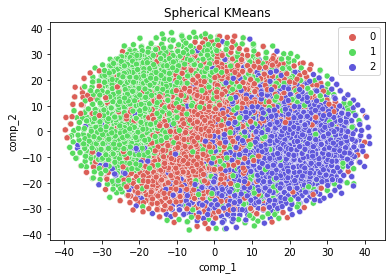

In [7]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df["y"] =y
df["comp_1"] = z[:,0]
df["comp_2"] = z[:,1]

sns.scatterplot(x="comp_1", y ="comp_2",hue= df.y.tolist(),palette=sns.color_palette("hls",3),data=df).set(title="Spherical KMeans")

# Call the K_Means class for the IRIS Dataset

In [37]:
df1['cluster_label'] = np.array(labels)
print("Cluster Label for the class Iris-setosa \n", df1[df1.species == 'Iris-setosa']['cluster_label'].value_counts())
print("--------------")
print("Cluster Label for the class Iris-versicolor \n", df1[df1.species == 'Iris-versicolor']['cluster_label'].value_counts())
print("--------------")
print("Cluster Label for the class Iris-virginica \n",df1[df1.species == 'Iris-virginica']['cluster_label'].value_counts())
print("--------------")

Cluster Label for the class Iris-setosa 
 0    50
Name: cluster_label, dtype: int64
--------------
Cluster Label for the class Iris-versicolor 
 1    47
2     3
Name: cluster_label, dtype: int64
--------------
Cluster Label for the class Iris-virginica 
 2    36
1    14
Name: cluster_label, dtype: int64
--------------


# Exploratory Data Analysis for the IRIS Dataset

C:\Users\venka\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


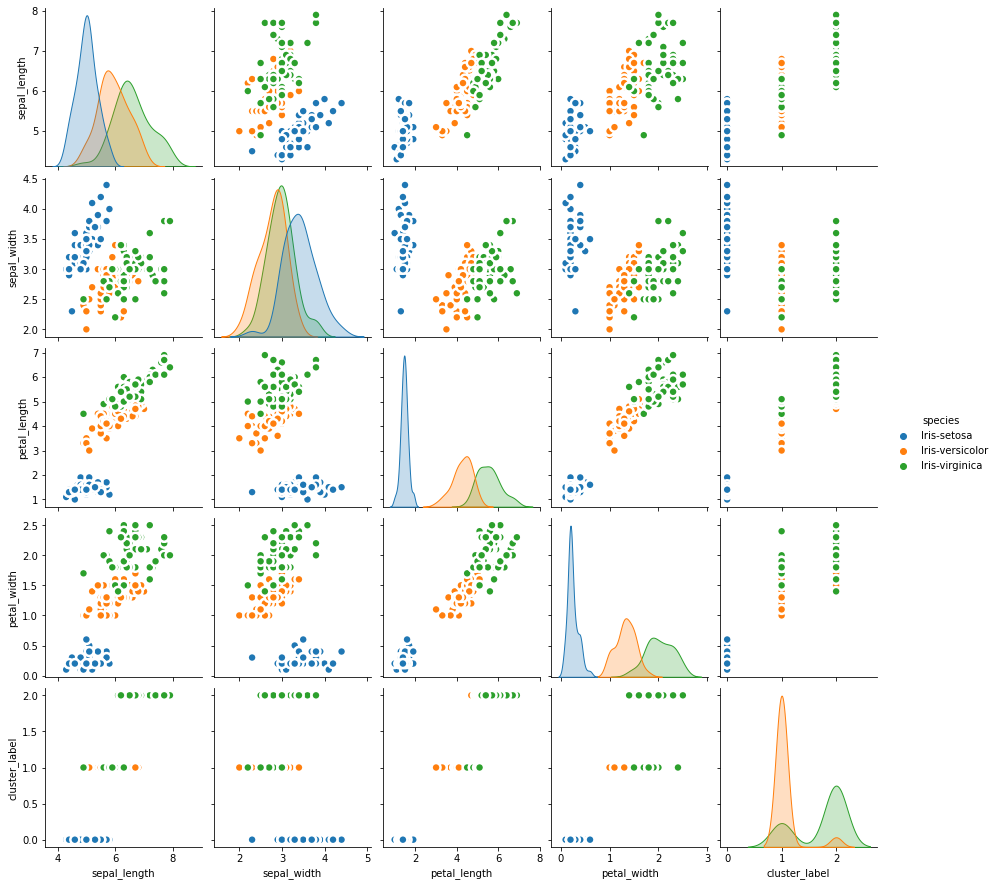

In [48]:
import seaborn as sns
# right: you can give other arguments with plot_kws.
sns.pairplot(df1, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# Image Segmentation - Fruits Image

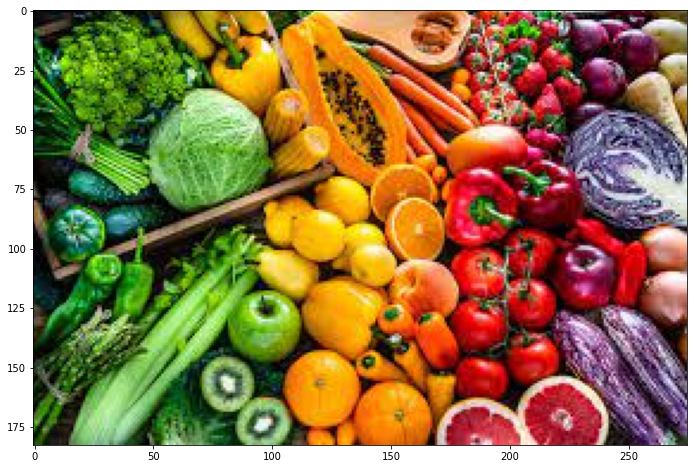

In [49]:
def ReadImage(filename):
    image = plt.imread(filename)
    plt.figure(figsize = (15,8))
    plt.imshow(image)
    return image

image = ReadImage('Fruits.jpg')

In [69]:
#Convert the image dataset into 2d array
x, y, z = image.shape
image_2d = image.reshape(x*y, z)
print(image_2d.shape)
print(image_2d[:2,:])

(50325, 3)
[[ 7 17  9]
 [ 9 16  9]]


In [56]:
#Callthe K-Means class
kmeans_image = K_Means(no_of_clusters=5, max_iter=10,threshold = .001) 
mean, labels = kmeans_image.fit(image_2d)
print(mean)

[[229.75262318 156.49167427  20.98049726]
 [172.42529121 181.11740551 138.24059331]
 [204.80298913  52.87618886  32.25033967]
 [ 36.65369268  57.03251128  18.96572251]
 [115.0345603   59.39921884  43.4881051 ]]


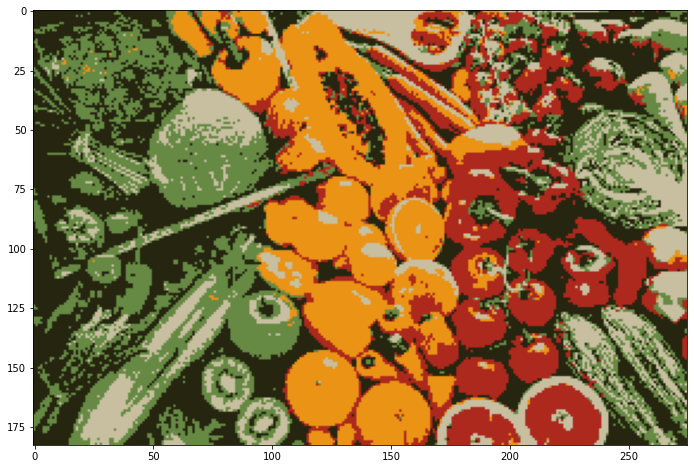

In [18]:
#Display the image on the clustered dataset
plt.figure(figsize = (15,8))
plt.imshow((mean[labels].reshape(x, y, z)).astype('uint8'))

# Image Segmentionation for IRIS image

Image Shape: (300, 900, 3)


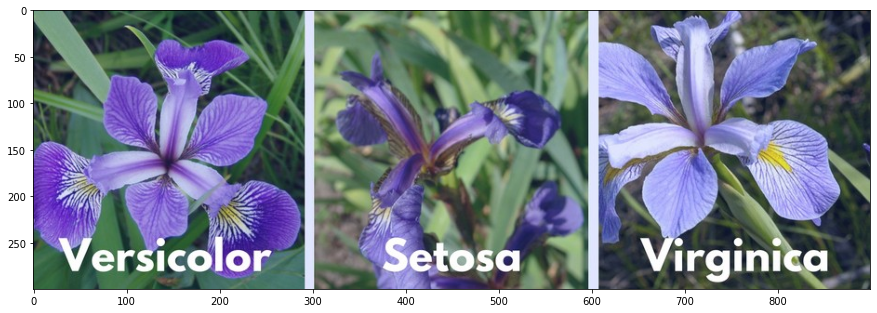

In [42]:
image = plt.imread("iris_flowers.jpg")
plt.figure(figsize = (15,8))
print("Image Shape:", image.shape)
plt.imshow(image)

In [43]:
x, y, z = image.shape
image_2d = image.reshape(x*y, z)
print(image_2d.shape)

(270000, 3)


In [44]:
kmeans_iris = K_Means(no_of_clusters=5, max_iter=10,threshold = .001) 
mean, labels = kmeans_iris.fit(image_2d)
print(mean)

[[ 45.52901826  59.88085859  59.38568921]
 [ 84.89691874 101.43763698  93.89809337]
 [134.91618116 156.92015806 127.90878464]
 [204.02312095 206.19717382 243.35306929]
 [128.28512092 112.68756394 199.92431559]]


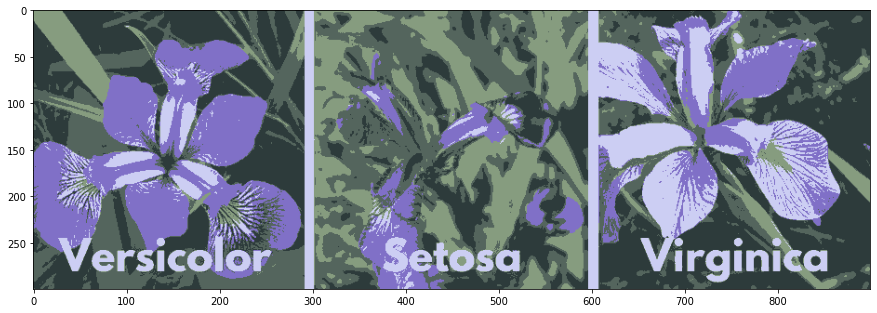

In [45]:
plt.figure(figsize = (15,8))
plt.imshow((mean[labels].reshape(x, y, z)).astype('uint8'))